### ***1. Importing Needed Libraries:***




In [ ]:
import numpy as np
import random
import math
from math import pi
import matplotlib.pyplot as plt
from numpy.random.mtrand import randint

### ***2. System Map Initialization:***



In [ ]:
X_mini = 0    
X_max = 100
Y_mini = 0
Y_max = 100

### ***3. System Initialization:*** 

In [ ]:
No_of_Towers = 30
No_of_Forbidden_Areas = 4
T_X_pos = np.zeros(No_of_Towers)
T_Y_pos = np.zeros(No_of_Towers)

TowerR=8

T_radius = np.ones(No_of_Towers)*TowerR
F_radius = np.array([5,10,5,10])

F_X_pos = np.array([ 20 , 80 , 90 , 30 ])
F_Y_pos = np.array([ 20 , 40 , 80 , 70 ])
color_list =['blue','green', 'yellow' , 'black' , 'maroon' ,'gray' , 'indigo', 'orange'] 

#-----------------------------------\\\  ///-----------------------------------#
#Looping Colors to all Towers
i = 0
while np.size(color_list)<No_of_Towers:
  color_list.append(color_list[i])
  i+= 1
  if i>7: i-=8
#-----------------------------------\\\  ///-----------------------------------#

### ***4. Functions Definitions:***


In [ ]:
#-----------------------------------\\\  ///-----------------------------------#
def Visualize_Solution(Members_List):
  plt.rcParams["figure.figsize"] = [3, 3]
  fig = plt.gcf()
  axes = fig.gca()
  axes.cla()
  axes.set_xlim((0, X_max))
  axes.set_ylim((0, Y_max))
  axes.set_aspect(1)
  for tower,color in zip(Members_List , color_list):
    #axes.add_artist(plt.Circle((tower[0], tower[1]), T_radius[0], color= color))    #Different Colours
    axes.add_artist(plt.Circle((tower[0], tower[1]), T_radius[0], color= 'maroon'))  #Constant Colour
    
  for i in range(0,No_of_Forbidden_Areas):
    axes.add_artist(plt.Circle((F_X_pos[i], F_Y_pos[i]),F_radius[i], color='r'))
  plt.title('Visualization Map')
  plt.ylabel("Y Coordinate")
  plt.xlabel("X Coordinate")
  plt.show()  
#-----------------------------------\\\  ///-----------------------------------#
def Towers_Intersection (Particle_No):
  Area = 0
  for i in range(0,No_of_Towers):
    for j in range(0,No_of_Towers):
      x_diff = Particles_Coordinates[Particle_No][i][0] - Particles_Coordinates[Particle_No][j][0]
      y_diff = Particles_Coordinates[Particle_No][i][1] - Particles_Coordinates[Particle_No][j][1]
      d = math.sqrt( pow(x_diff, 2) + pow(y_diff, 2) )

      if (( i != j ) & ( d < (2*TowerR) )): # If intersecting
        intersection = 2 * pow(TowerR, 2) * np.arccos( 0.5*d/TowerR ) - 0.5 * math.sqrt( (2*TowerR-d)*d*d*(2*TowerR+d) )
        Area += intersection

  Area/=2
  return Area
#-----------------------------------\\\  ///-----------------------------------#
def Towers_Area (Particle_No):
  return No_of_Towers * pi * pow(TowerR, 2) - Towers_Intersection(Particle_No)

#-----------------------------------\\\  ///-----------------------------------#
def Particle_obj_fn (Particle_No):
  Area = Towers_Area(Particle_No)
  #Penalty = Towers_Forbidden(Particles_Coordinates, Particle_No)
  Forb_Area = 0
  for j in range(0,No_of_Forbidden_Areas):  
    Forb_Area += pi * pow(F_radius[j], 2)
  return Area + Forb_Area  #+400*Penalty
#-----------------------------------\\\  ///-----------------------------------#
def RAND_Feasiblity_Correction(Particle_No):
  for i in range(0,No_of_Towers):
    intersecting = 1
    while( intersecting ): # If intersecting with a RED ZONE
      intersecting = 0
      for j in range(0,No_of_Forbidden_Areas):  
        x_diff = Particles_Coordinates[Particle_No][i][0] - F_X_pos[j]
        y_diff = Particles_Coordinates[Particle_No][i][1] - F_Y_pos[j]
        d = math.sqrt( pow(x_diff, 2) + pow(y_diff, 2) )
        if ( d < (TowerR + F_radius[j]) ):
          intersecting = 1
          #Randomly Correct Interesting Towers
          Particles_Coordinates[Particle_No][i][0] = np.random.randint(0+TowerR, 100-TowerR)
          Particles_Coordinates[Particle_No][i][1] = np.random.randint(0+TowerR, 100-TowerR)
#-----------------------------------\\\  ///-----------------------------------#
def Feasiblity_Correction(Particle_No):
  for i in range(0,No_of_Towers):
    intersecting = 1
    while( intersecting ): # If intersecting with a RED ZONE
      intersecting = 0
      for j in range(0,No_of_Forbidden_Areas):  
        x_diff = Particles_Coordinates[Particle_No][i][0] - F_X_pos[j]
        y_diff = Particles_Coordinates[Particle_No][i][1] - F_Y_pos[j]
        d = math.sqrt( pow(x_diff, 2) + pow(y_diff, 2) )
        #----------------------------------------------------------------------#
        if ( d < (TowerR + F_radius[j]) ):
          intersecting = 1

          #CHECK #Visualize_Solution(Particles_Coordinates[Particle_No])

          #Intentionally Correct Interesting Towers
          SpeedFactor=2

          if(x_diff !=0):
            Particles_Coordinates[Particle_No][i][0] = Particles_Coordinates[Particle_No][i][0] + (x_diff/abs(x_diff)) * SpeedFactor

          if(y_diff !=0):
            Particles_Coordinates[Particle_No][i][1] = Particles_Coordinates[Particle_No][i][1] + (y_diff/abs(y_diff)) * SpeedFactor

          #CHECK #Visualize_Solution(Particles_Coordinates[Particle_No])
#-----------------------------------\\\  ///-----------------------------------#

### ***5. Particle Swarm Optimization (GA) Initialization and Approach :***

####*5.1 Algorithm's Parameters Initalization :*

---



In [ ]:
Swarm = 20 # swarm size 

Scale=0.001

IW =   5*Scale #Inertia weight 
C1 = 200*Scale #Global best acceleration
C2 =  70*Scale #Personal best acceleration 

Max_Num_Generation = 20

####*5.2 Algorithm's First Generation Initalization :*

---



In [ ]:
#Step(1): Generate First Generation :

Particles_Coordinates = np.random.randint(0+TowerR, 100-TowerR, [Swarm,No_of_Towers,2]) 
Particles_Velocities = np.zeros([Swarm,No_of_Towers,2])

Personal_Best_fit = np.zeros([Swarm]) #Personal Values for each Particle
Personal_Best_Particles = np.zeros([Swarm,No_of_Towers,2]) #Personal Coordinates of Towers for each Particle

MAX_Fitness = 0

Obj_Fn_Records = np.zeros([Max_Num_Generation])

#Feasibility Check for each Particle in the Swarm
for mem_No in range(0,Swarm):
  RAND_Feasiblity_Correction(mem_No)

####*5.3 Algorithm's Process Loop :*

---



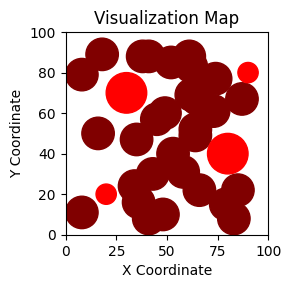

5271.91250858596


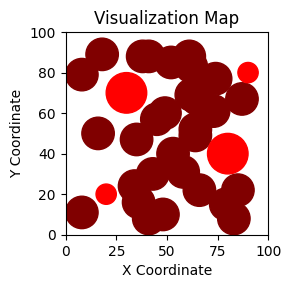

5271.91250858596


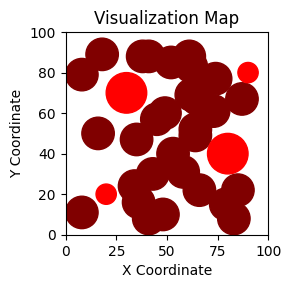

5271.91250858596


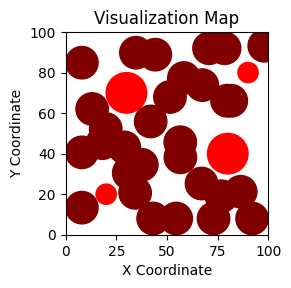

5751.697871753455


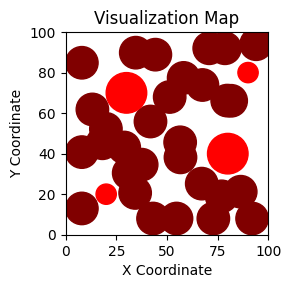

5752.311882144062


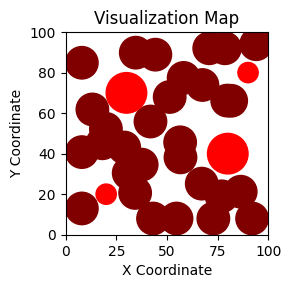

5752.317531804726


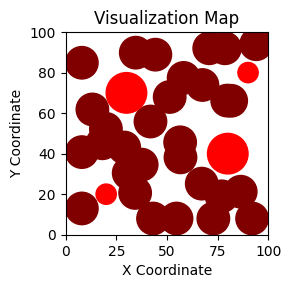

5752.317560044976


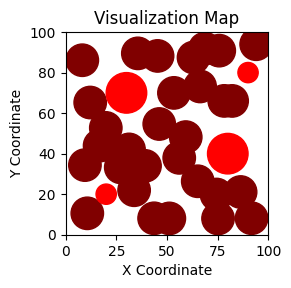

5880.454710911314


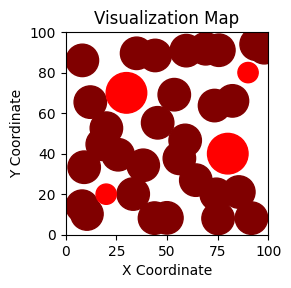

5815.145067831053


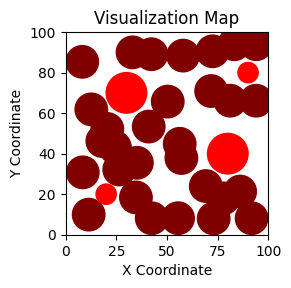

5924.612782649143


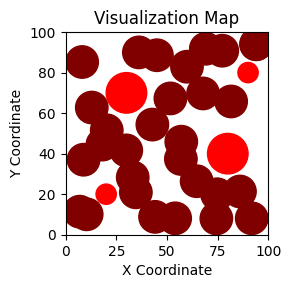

5788.551792709501


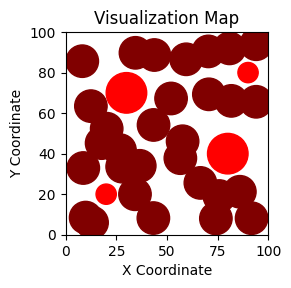

5891.341930966942


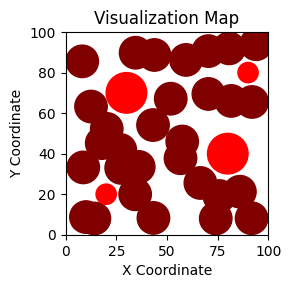

5871.548549390678


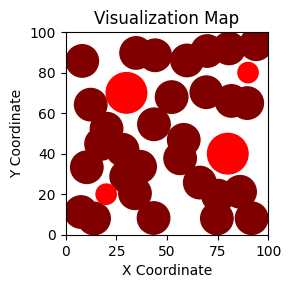

5927.389660330569


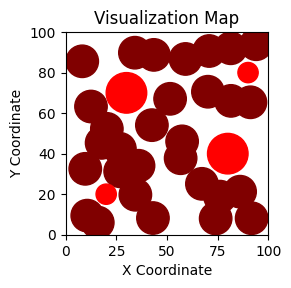

5921.081168828128


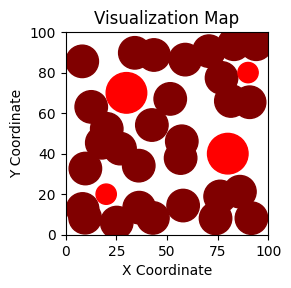

5960.048792422443


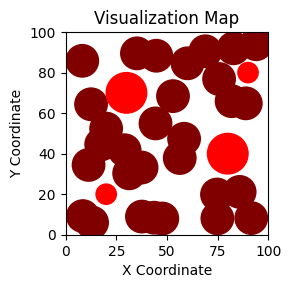

5694.155618550697


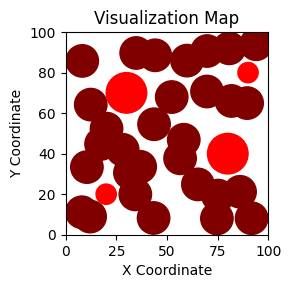

5863.731285562981


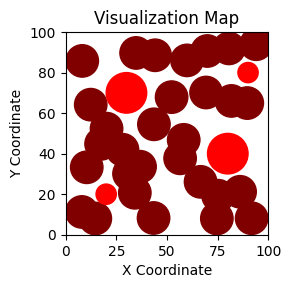

5897.120840855611


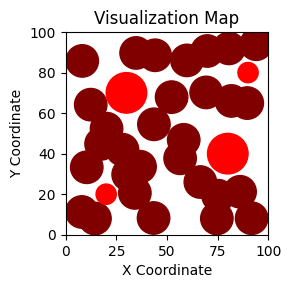

5904.511348816689
---------------------------------------------------------------------


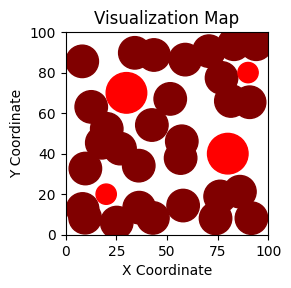

5960.048792422443
---------------------------------------------------------------------
Swarm Size =  20 ///  Number of Iterations =  20
Inertia W  =  0.005 ///  Global W   =  0.2 ///  Personal W =  0.07
---------------------------------------------------------------------


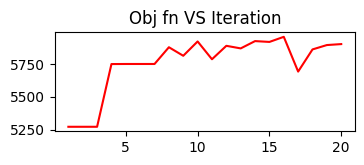

In [ ]:
for Generation_Counter in range(0,Max_Num_Generation):

#Step(2): Calculate Fitness Function of All Members Of the Generation:
  fitnesses= [0]*Swarm
  for mem_No in range(0,Swarm):
    #X_Coordinates = Particles[mem_No,:,0]
    #Y_Coordinates = Particles[mem_No,:,1]
    fitnesses[mem_No] = Particle_obj_fn(mem_No)
#------------------------------------------------------------------------------#

#Step(3): Update the Personal Best of all members of this Generation
  for mem_No in range(0,Swarm):
    if Personal_Best_fit[mem_No] < fitnesses[mem_No]:

      Personal_Best_fit[mem_No] = fitnesses[mem_No]
      Personal_Best_Particles[mem_No] = Particles_Coordinates[mem_No]
#------------------------------------------------------------------------------#

#Step(4): Find Global Best:
  Global_Best_Fitness = max(fitnesses)
  Global_Best_index = fitnesses. index(Global_Best_Fitness)
  Global_Best = Particles_Coordinates[Global_Best_index]

  Visualize_Solution(Global_Best)
  print(Global_Best_Fitness)
  Obj_Fn_Records[Generation_Counter] = Global_Best_Fitness
  #print(fitnesses)
#------------------------------------------------------------------------------#

#Step(5): Update Velocities:
  for mem_No in range(0,Swarm):
    Global_Factor   = C1*random.random() * (Global_Best - Particles_Coordinates[mem_No])
    Personal_Factor = C2*random.random() * (Personal_Best_Particles[mem_No] - Particles_Coordinates[mem_No])

    Particles_Velocities[mem_No] = Particles_Velocities[mem_No]*IW + Global_Factor + Personal_Factor
#------------------------------------------------------------------------------#

#Step(6): Update Positions:
    Particles_Coordinates = Particles_Coordinates + Particles_Velocities
#------------------------------------------------------------------------------#

#Step(7): Validate Constraints:
    for mem_No in range(0,Swarm):
      for T in range(0,No_of_Towers):
        for C in range(0,2):
          if Particles_Coordinates[mem_No][T][C] <0+TowerR :   Particles_Coordinates[mem_No][T][C] = TowerR 
          if Particles_Coordinates[mem_No][T][C] >100-TowerR : Particles_Coordinates[mem_No][T][C] = 100-TowerR 
      Feasiblity_Correction(mem_No)
          
#------------------------------------------------------------------------------#
#Step(8): Store The MAXIMUM Global Best:
  if (Global_Best_Fitness > MAX_Fitness):
   MAX_Fitness = Global_Best_Fitness
   MAX = Global_Best
#------------------------------------------------------------------------------#
#END OF LOOP
print("---------------------------------------------------------------------")
Visualize_Solution(MAX)
print(MAX_Fitness)
print("---------------------------------------------------------------------")
print("Swarm Size = ", Swarm , "///  Number of Iterations = ", Max_Num_Generation )
print("Inertia W  = ", IW ,"///  Global W   = ",C1 , "///  Personal W = ",C2 )
print("---------------------------------------------------------------------")
#------------------------------------------------------------------------------#
plt.rcParams["figure.figsize"] = [3.75, 1.75]
plt.rcParams["figure.autolayout"] = True

y = Obj_Fn_Records
x = np.linspace(1, Max_Num_Generation, Max_Num_Generation)

plt.title("Obj fn VS Iteration")
plt.plot(x, y, color="red")

plt.show()
#------------------------------------------------------------------------------#